# Construction d'un restrictive boltzmann machine

In [ ]:
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
#chargement des données de binary_alpha_digts
data=loadmat('/content/drive/MyDrive/Cours TélécomParis/RBM/binaryalphadigs.mat')
images = data['dat']

In [ ]:
#fonction qui prend un entier n et qui montre tous les caractères liés à cet entier dans la base binary_alpha_digits
def display_digit(n):
  for k in range(39):
    plt.subplot(7,6,k+1)
    plt.imshow(images[n][k],cmap="binary")

In [ ]:
def lire_alpha_digit(vector):
  l=[]
  for x in vector:
    for k in range(images[x].shape[0]):
      l.append(images[x][k].flatten())
  X = np.asarray(l)
  return X



In [ ]:
def sigmoid(x):
 return 1/(1+np.exp(-(x)))

In [ ]:
class RBM:

 def __init__(self,nb_latente,nb_visible):
    self.h_biais=np.zeros(shape=(nb_latente))
    self.v_biais=np.zeros(shape=(nb_visible))
    self.W= np.random.randn(nb_visible, nb_latente) * ((0.01)**(1/2))

 def entree_sortie_RBM(self,v_entree):
  valeur_sigmoid=sigmoid(self.h_biais+v_entree@self.W)
  return valeur_sigmoid

 def sortie_entree_RBM(self,h_sortie):
  valeur_sigmoid=sigmoid((self.v_biais)+h_sortie@self.W.T)
  return valeur_sigmoid

 def train_RBM(self,data,nbr_iteration=100,lr=0.1,batch_size=8):
   p=self.v_biais.shape[0]
   q=self.h_biais.shape[0]
   n = data.shape[0]
   mean_square_error=[]
   for i in range(nbr_iteration):
      X = np.random.permutation(data)
      for j in range(0,n,batch_size):
        x_batch=X[j:min(j+batch_size,n)]
        tb=x_batch.shape[0]
        hs=self.entree_sortie_RBM(x_batch)
        hb = (np.random.rand(tb,q)< hs ) *1
        vs=self.sortie_entree_RBM(hb)
        vb = (np.random.rand(tb,p)< vs ) *1
        hs2=self.entree_sortie_RBM(vb)
        hb2 = (np.random.rand(tb,q)< hs2 ) *1
        gradW= (x_batch.T@hs-vb.T@hs2)
        gradA=np.sum(x_batch-vb)
        gradB=np.sum(hs-hs2)
        self.W=self.W+lr*gradW/tb
        self.h_biais=self.h_biais+lr*gradB/tb
        self.v_biais=self.v_biais+lr*gradA/tb

      H=self.entree_sortie_RBM(X)
      X_rec = self.sortie_entree_RBM(H)
      mean_square_error.append(((X-X_rec)**2).mean())

   return  mean_square_error

 def générer_image_RBM(self,nbr_image,nbr_iteration):
  p = self.v_biais.shape[0]
  q = self.h_biais.shape[0]
  sample = (np.random.rand(nbr_image,p)< np.random.rand(nbr_image,p))*1
  for k in range(nbr_iteration):
            hs = sigmoid(sample @ self.W + self.h_biais)
            hb = (np.random.rand(nbr_image,q)< hs ) *1
            vs = sigmoid(hb @ self.W.T + self.v_biais)
            sample =(np.random.rand(nbr_image,p)<vs)*1
  for k in range(nbr_image):
    plt.subplot(int(np.sqrt(nbr_image))+1,int(np.sqrt(nbr_image))+1 ,k+1)
    plt.imshow(sample[k].reshape(20,16),cmap='binary')
    plt.axis("off")
  plt.suptitle(f'pour {nbr_iteration} itérations')
  plt.show()


## Dans cette section nous avons étudié l'influence des différents paramètres du RBM

La prochaine cellule est pour le calcul de l'erreur quadatrique moyenne en fonction du nombre d'éléments à apprendre

In [ ]:
listerror=[]
liste=[10,11,12,13]
for k in range(1,5):
 data=lire_alpha_digit(liste[:k])
 rbm=RBM(100,320)
 listerror.append(rbm.train_RBM(data,nbr_iteration=200,lr=0.1,batch_size=4))
for i, col in enumerate(listerror):
    plt.plot(col, label=f'{(i+1)} caractère à apprendre')
plt.xlabel('nbr itération')
plt.ylabel('mean square error')
plt.legend()
plt.title('erreur de reconstruction sur ABCD en fonction du nombre de caractère à apprendre')

Text(0.5, 1.0, 'erreur de reconstruction sur ABCD en fonction du nombre de caractère à apprendre')

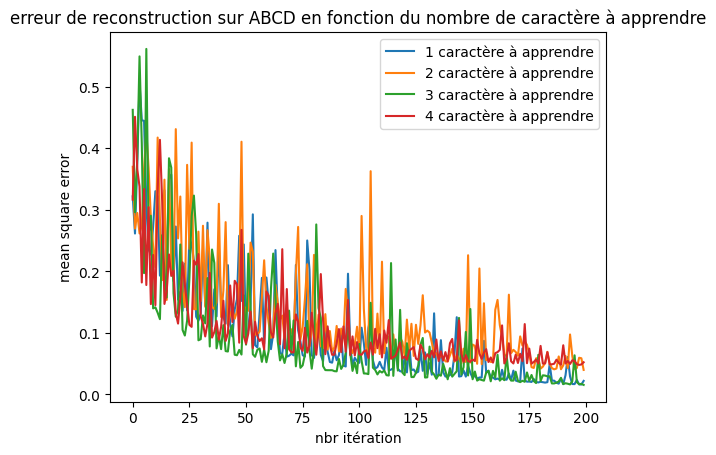

Les prochaines cellules montre le pouvoir de modélisation du RBM en fonction du nombre d'éléments à apprendre.

In [ ]:
listerror=[]
for k in range(1,8):
 data=lire_alpha_digit([10])
 rbm=RBM(100,320)
 listerror.append(rbm.train_RBM(data,nbr_iteration=200,lr=0.01*k,batch_size=4))
for i, col in enumerate(listerror):
    plt.plot(col, label=f'learning rate:{(i+1)} ')
plt.xlabel('nbr itération')
plt.ylabel('mean square error')
plt.legend()
plt.title('erreur de reconstruction sur A en fonction du learning rate')

In [ ]:
listerror=[]
for k in range(1,8):
 data=lire_alpha_digit([10])
 rbm=RBM(100,320)
 listerror.append(rbm.train_RBM(data,nbr_iteration=200,lr=0.01,batch_size=2**k))
for i, col in enumerate(listerror):
    plt.plot(col, label=f'batch size {(i+1)} ')
plt.xlabel('nbr itération')
plt.ylabel('mean square error')
plt.legend()
plt.title('erreur de reconstruction sur A en fonction du batch_size')

In [ ]:
listerror=[]
for k in range(1,5):
 data=lire_alpha_digit([10])
 rbm=RBM(100*k,320)
 listerror.append(rbm.train_RBM(data,nbr_iteration=200,lr=0.01,batch_size=4))
for i, col in enumerate(listerror):
    plt.plot(col, label=f'batch size {(i+1)} ')
plt.xlabel('nbr itération')
plt.ylabel('mean square error')
plt.legend()
plt.title('erreur de reconstruction sur A en fonction du nombre de valeurs latentes')

In [ ]:
#On entraîne un modèle, pour chaque expérience, on change les paramètres à la main
data=lire_alpha_digit([10,11,12])
rbm=RBM(100,320)
z=rbm.train_RBM(data,nbr_iteration=100,lr=0.01,batch_size=4)


In [ ]:
# on affiche des images générés par le rbm en fonction du nombre d'itérations pour l'échantillonneur de gibbs
for i in range(10):
 rbm.générer_image_RBM(20,10*i)

## Dans cette partie on va étudier le RBM sur les bases de données Mnist et fashion Mnist

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
# classe fille du rbm, il faut juste changer la fonction générer image par souci de taille des images générés
class RBMnist(RBM):
 def générer_image_RBM(self,nbr_image,nbr_iteration):
  p = self.v_biais.shape[0]
  q = self.h_biais.shape[0]
  sample = (np.random.rand(nbr_image,p)< np.random.rand(nbr_image,p))*1

  for k in range(nbr_iteration):
            hs = sigmoid(sample @ self.W + self.h_biais)
            hb = (np.random.rand(nbr_image,q)< hs ) *1
            vs = sigmoid(hb @ self.W.T + self.v_biais)
            sample =(np.random.rand(nbr_image,p)<vs)*1
  for k in range(nbr_image):
    plt.subplot(int(np.sqrt(nbr_image))+1,int(np.sqrt(nbr_image))+1 ,k+1)
    plt.imshow(sample[k].reshape(28,28),cmap='binary')
    plt.axis('off')
  plt.suptitle(f'pour {nbr_iteration} itérations')
  plt.show()


In [ ]:
# charge les données associés à un label de MNIST dans le vecteur, puis les binarise et aplatis les images
def lire_mnist(vector):
  l=[]
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  for x in vector:
    indices= np.where(y_train == x)
    x_train_bis= x_train[indices][:500]
    x_train_b = (x_train_bis > 127)*1
    for image in x_train_b:
      l.append(image.flatten())

  X = np.asarray(l)
  return X

In [ ]:
#prend en argument une liste d'immage flattened de Mnist et un nombre d'entier n pour pour montrer n image au hasard de cette liste
def display_binary_digits(l,n):
  indices=np.random.randint(0,l.shape[0],n)
  sqr=int(np.sqrt(n))+1
  for k,x in enumerate(indices):
    plt.subplot(sqr,sqr,k+1)
    plt.imshow(l[x].reshape((28,28)),cmap="binary")
    plt.axis("off")

In [ ]:
l=lire_mnist([5,6,4])

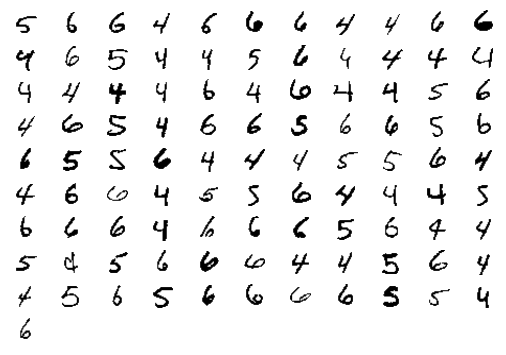

In [ ]:
display_binary_digits(l,100)

In [ ]:
len(l)

1500

In [ ]:
#On entraîne un modèle, pour chaque expérience, on change les paramètres à la main
rbm=RBMnist(100,784)
rbm.train_RBM(l,nbr_iteration=20,lr=0.1,batch_size=128)

In [ ]:
# on affiche des images générés par le rbm en fonction du nombre d'itérations pour l'échantillonneur de
for i in range(20):
 rbm.générer_image_RBM(20,10*i)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# charge les données associés à un label de fashion MNIST dans le vecteur, puis les binarise et aplatis les images
def lire_mnistfashion(vector):
  l=[]
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  for x in vector:
    indices= np.where(y_train == x)
    x_train_bis= x_train[indices][:500]
    x_train_b = (x_train_bis > 20)*1
    for image in x_train_b:
      l.append(image.flatten())
  X = np.asarray(l)
  return X

In [ ]:
X=lire_mnistfashion([8])

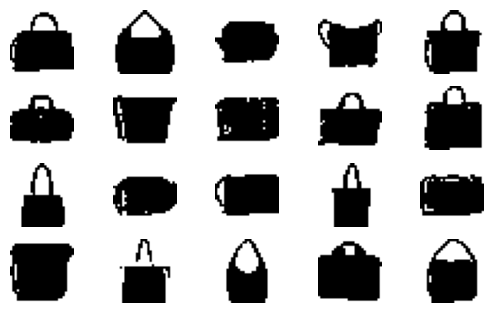

In [ ]:
display_binary_digits(X,20)

In [ ]:
#On entraîne un modèle, pour chaque expérience, on change les paramètres à la main
rbm=RBMnist(200,784)
rbm.train_RBM(X,nbr_iteration=50,lr=0.1,batch_size=16)

In [ ]:
# on affiche des images générés par le rbm en fonction du nombre d'itérations pour l'échantillonneur de gibbs
for i in range(10):
 rbm.générer_image_RBM(20,10*i)

## Dans cette partie on utilise un VAE pour ensuite comparer les résultats à ceux obtenus avec le RBM

11490434/11490434 [==============================] - 0s 0us/step
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_encoder (InputLayer)  [(None, 784)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 256)                  200960    ['input_encoder[0][0]']       
                                                                                                  
 z_mean (Dense)              (None, 16)                   4112      ['dense[0][0]']               
                                                                                                  
 z_log_var (Dense)           (None, 16)                   4112      ['dense[0][0]']               
                           

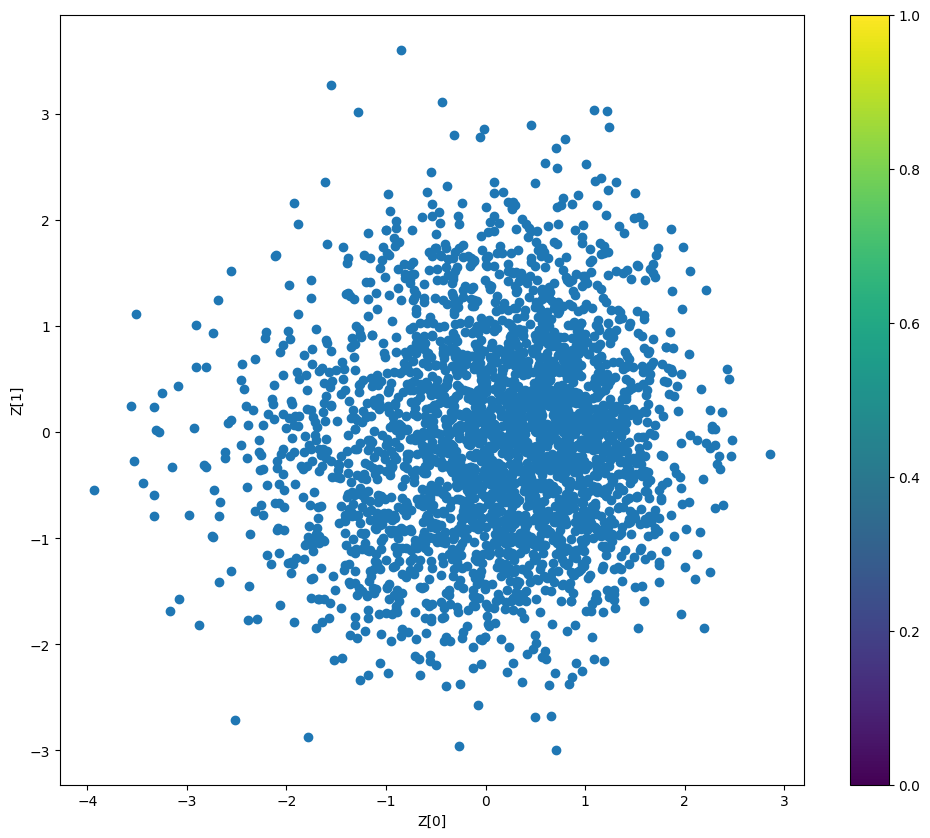

4/4 [==============================] - 0s 4ms/step


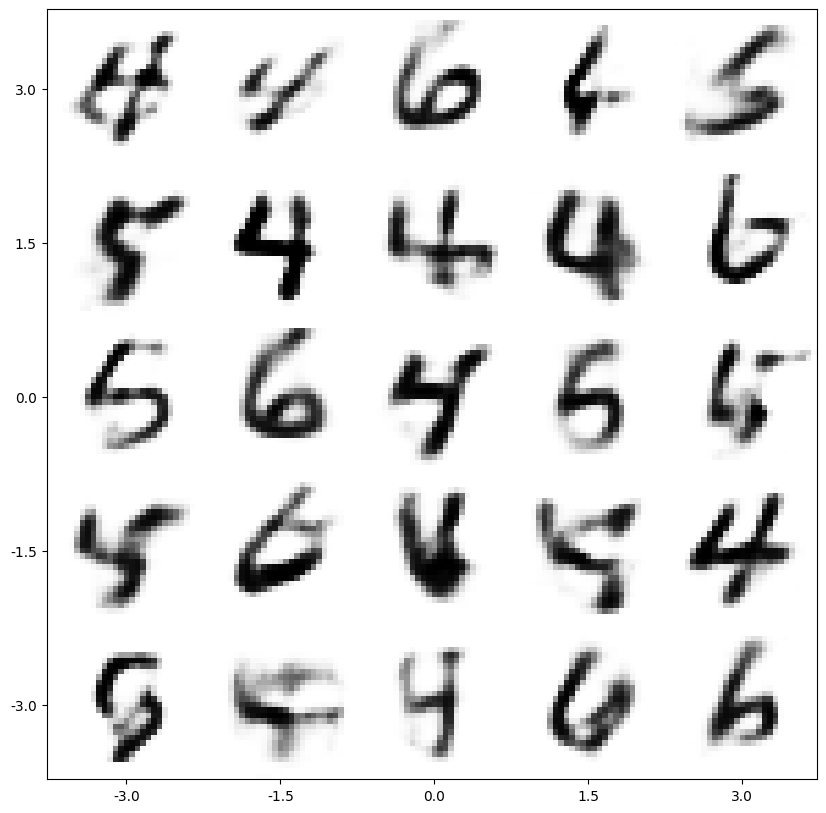

In [ ]:
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

(x_train_data, y_train_data), (x_test_data, y_test_data) = mnist.load_data()
caracs = [4,5,6]
x_train = []
x_test = [  ]
for i in range(60000):
  if y_train_data[i] in caracs :
    x_train.append(x_train_data[i])
  if i < 10000:
    if y_test_data[i] in caracs :
      x_test.append(x_test_data[i])
x_train_data = np.array(x_train)
x_test_data = np.array(x_test)


image_size = x_train_data.shape[1]
original_dim = image_size * image_size
x_train_data = np.reshape(x_train_data, [-1, original_dim])
x_test_data = np.reshape(x_test_data, [-1, original_dim])
x_train_data = x_train_data.astype('float32') / 255
x_test_data = x_test_data.astype('float32') / 255
input_shape = (original_dim, )
batch_size = 128

def latent_sampling(args):
    z_mean_layer, z_log_var_layer = args
    batch = K.shape(z_mean_layer)[0]
    dimension = K.int_shape(z_mean_layer)[1]
    ep = K.random_normal(shape=(batch, dimension))
    return z_mean_layer + K.exp(0.5 * z_log_var_layer) * ep

def create_model(hidden_node, latent_node):
    # build encoder model
    # input layer
    encoder_inputs = Input(shape=input_shape, name='input_encoder')
    # hidden layer
    encoder_hidden = Dense(hidden_node, activation='relu')(encoder_inputs)

    z_mean = Dense(latent_node, name='z_mean')(encoder_hidden)
    z_log_var = Dense(latent_node, name='z_log_var')(encoder_hidden)

    # normalize log variance to std dev
    z = Lambda(latent_sampling, output_shape=(latent_node,), name='z')([z_mean, z_log_var])

    # instantiate encoder model
    encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
    encoder.summary()

    # build decoder model
    latent_encoder_inputs = Input(shape=(latent_node,), name='latent_sampling')
    decoder_hidden = Dense(hidden_node, activation='relu')(latent_encoder_inputs)
    decoder_outputs = Dense(original_dim, activation='sigmoid')(decoder_hidden)

    # instantiate decoder model
    decoder = Model(latent_encoder_inputs, decoder_outputs, name='decoder')
    decoder.summary()

    # instantiate VAE model
    model_outputs = decoder(encoder(encoder_inputs)[2])
    vae = Model(encoder_inputs, model_outputs, name='vae_mlp')

    reconstruction_loss = binary_crossentropy(encoder_inputs, model_outputs)
    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    #vae.summary()
    return vae, encoder, decoder

def train_model(model):
    trained_model = model.fit(x_train_data, epochs=epochs,
                batch_size=batch_size,
                validation_data=(x_test_data, None))
    return trained_model

def plot_latent_space(encoder):
    z_test, _, _ = encoder.predict(x_test_data, batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_test[:, 0], z_test[:, 1])
    plt.colorbar()
    plt.xlabel("Z[0]")
    plt.ylabel("Z[1]")
    plt.savefig("VAE")
    plt.show()

def plot_vae_output(decoder,latent_dim):
    n = 5
    digit_num = 28
    figure = np.zeros((digit_num * n, digit_num * n))
    axis_x = np.linspace(-3, 3, n)
    axis_y = np.linspace(-3, 3, n)[::-1]
    for i, yi in enumerate(axis_y):
        for j, xi in enumerate(axis_x):
            if(latent_dim == 2):
                latent_sample = np.array([[xi, yi]*int(latent_dim/2)])
            else:
                latent_sample = np.random.normal(0,1,size=[batch_size, latent_dim])
            input_decoded = decoder.predict(latent_sample)
            digit = input_decoded[0].reshape(digit_num, digit_num)
            figure[i * digit_num: (i + 1) * digit_num,
                   j * digit_num: (j + 1) * digit_num] = digit

    plt.figure(figsize=(10, 10))
    i_range = digit_num // 2
    j_range = (n - 1) * digit_num + i_range + 1
    pixel_range = np.arange(i_range, j_range, digit_num)
    sample_range_x = np.round(axis_x, 1)
    sample_range_y = np.round(axis_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.imshow(figure, cmap='binary')
    plt.savefig("VAE_Output")
    plt.show()

#Create VAE model with 2 code units and generating images by varying each code unit from -3 to 3
intermediate_dim = 256
latent_dim = 16
epochs = 50
vae, encoder, decoder = create_model(intermediate_dim, latent_dim)
trained_model = train_model(vae)
plot_latent_space(encoder)
plot_vae_output(decoder, latent_dim)